## Spark

In [ ]:
#@title  <-- Run Me: (Hidden) Installing Spark
%%bash 

## Setup Spark on Colab
pip install -q pyspark
apt-get -qq install -y openjdk-8-jdk-headless

## Setup port-forwarding

# Download ngrok
wget -q https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
# Unload ngrok
unzip -q ngrok-stable-linux-amd64.zip

Selecting previously unselected package openjdk-8-jre-headless:amd64.
(Reading database ... 155501 files and directories currently installed.)
Preparing to unpack .../openjdk-8-jre-headless_8u312-b07-0ubuntu1~18.04_amd64.deb ...
Unpacking openjdk-8-jre-headless:amd64 (8u312-b07-0ubuntu1~18.04) ...
Selecting previously unselected package openjdk-8-jdk-headless:amd64.
Preparing to unpack .../openjdk-8-jdk-headless_8u312-b07-0ubuntu1~18.04_amd64.deb ...
Unpacking openjdk-8-jdk-headless:amd64 (8u312-b07-0ubuntu1~18.04) ...
Setting up openjdk-8-jre-headless:amd64 (8u312-b07-0ubuntu1~18.04) ...
update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/orbd to provide /usr/bin/orbd (orbd) in auto mode
update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/servertool to provide /usr/bin/servertool (servertool) in auto mode
update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/tnameserv to provide /usr/bin/tnameserv (tnameserv) in auto mode
Setting up ope

In [ ]:
#@title  <-- Run Me: (Hidden) Environment Variable Setup
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

In [ ]:
import pyspark 
from pyspark.sql import *
from pyspark.sql.functions import *
from pyspark import SparkContext, SparkConf

# Set configuration scope to be local and use port 4050
config_scope = SparkConf().set("spark.ui.port", "4050")

# Create the connection to a Spark cluster
sc = pyspark.SparkContext(conf = config_scope)

# Create a session to programmatically build Spark RDD, DataFrame and DataSet
spark = SparkSession.builder.getOrCreate()

## Load data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read in data
TRAIN_DIR = "drive/MyDrive/STAT480/dataset/track2"

In [ ]:
training = spark.read.option("header","false").option("delimiter","\t").csv(TRAIN_DIR+'/training.txt')
training = training.selectExpr('_c0 as Click', '_c1 as Impression', '_c2 as AdURL', '_c3 as AdId', '_c4 as AdvId', 
                    '_c5 as Depth', '_c6 as Pos', '_c7 as QId', '_c8 as KeyId', '_c9 as TitleId', 
                    '_c10 as DescId', '_c11 as UId')
training.show(5)

+-----+----------+--------------------+--------+-----+-----+---+-------+-----+-------+------+------+
|Click|Impression|               AdURL|    AdId|AdvId|Depth|Pos|    QId|KeyId|TitleId|DescId|   UId|
+-----+----------+--------------------+--------+-----+-----+---+-------+-----+-------+------+------+
|    0|         1| 4298118681424644510| 7686695|  385|    3|  3|   1601| 5521|   7709|   576|490234|
|    0|         1| 4860571499428580850|21560664|37484|    2|  2|2255103|  317|  48989| 44771|490234|
|    0|         1| 9704320783495875564|21748480|36759|    3|  3|4532751|60721| 685038| 29681|490234|
|    0|         1|13677630321509009335| 3517124|23778|    3|  1|   1601| 2155|   1207|  1422|490234|
|    0|         1| 3284760244799604489|20758093|34535|    1|  1|4532751|77819| 266618|222223|490234|
+-----+----------+--------------------+--------+-----+-----+---+-------+-----+-------+------+------+
only showing top 5 rows



In [ ]:
queryid = spark.read.option("header","false").option("delimiter","\t").csv(TRAIN_DIR+'/queryid_tokensid.txt')
queryid = queryid.selectExpr('_c0 as QId', '_c1 as Query')
queryid.show(5)

+---+----------+
|QId|     Query|
+---+----------+
|  0|     12731|
|  1|1545|75|31|
|  2|       383|
|  3|  518|1996|
|  4|4189|75|31|
+---+----------+
only showing top 5 rows



In [ ]:
purchasekeywordid = spark.read.option("header","false").option("delimiter","\t").csv(TRAIN_DIR+'/purchasedkeywordid_tokensid.txt')
purchasekeywordid = purchasekeywordid.selectExpr('_c0 as KeyId', '_c1 as PurchaseKeyword')
purchasekeywordid.show(5)

+-----+---------------+
|KeyId|PurchaseKeyword|
+-----+---------------+
|    0|          12731|
|    1|           1545|
|    2|            477|
|    3|     1545|75|31|
|    4|            279|
+-----+---------------+
only showing top 5 rows



In [ ]:
descriptionid = spark.read.option("header","false").option("delimiter","\t").csv(TRAIN_DIR+'/descriptionid_tokensid.txt')
descriptionid = descriptionid.selectExpr('_c0 as DescId', '_c1 as Description')
descriptionid.show(5)

+------+--------------------+
|DescId|         Description|
+------+--------------------+
|     0|1545|31|40|615|1|...|
|     1|172|46|467|170|56...|
|     2|2672|6|1159|10966...|
|     3|13280|35|1299|26|...|
|     4|13327|99|128|494|...|
+------+--------------------+
only showing top 5 rows



In [ ]:
userid = spark.read.option("header","false").option("delimiter","\t").csv(TRAIN_DIR+'/userid_profile.txt')
userid = userid.selectExpr('_c0 as UId', '_c1 as Gender', '_c2 as Age')
userid.show(5)

+---+------+---+
|UId|Gender|Age|
+---+------+---+
|  1|     1|  5|
|  2|     2|  3|
|  3|     1|  5|
|  4|     1|  3|
|  5|     2|  1|
+---+------+---+
only showing top 5 rows



In [ ]:
titleid = spark.read.option("header","false").option("delimiter","\t").csv(TRAIN_DIR+'/titleid_tokensid.txt')
titleid = titleid.selectExpr('_c0 as TitleId', '_c1 as Titile')
titleid.show(5)

+-------+--------------------+
|TitleId|              Titile|
+-------+--------------------+
|      0|615|1545|75|31|1|...|
|      1|466|582|685|1|42|...|
|      2|12731|190|513|127...|
|      3|2371|3970|1|2805|...|
|      4|165|134|460|2887|...|
+-------+--------------------+
only showing top 5 rows



## Data pre-processing

In [ ]:
# User
merge_training = training.join(userid, on="UId", how="inner")
merge_training.show(5)

+--------+-----+----------+--------------------+--------+-----+-----+---+-----+------+-------+-------+------+---+
|     UId|Click|Impression|               AdURL|    AdId|AdvId|Depth|Pos|  QId| KeyId|TitleId| DescId|Gender|Age|
+--------+-----+----------+--------------------+--------+-----+-----+---+-----+------+-------+-------+------+---+
|10000108|    1|         1|16004847651863108809|20580649|33712|    1|  1|70637|433604|1873667|1447913|     1|  3|
|10000108|    0|         1| 5888277431783335848| 7955169| 6520|    2|  2| 1103|  1727|   1537|   2058|     1|  3|
|10000108|    0|         1| 6912851286990253226|20812538|18903|    2|  1| 1103|  1727|   8112|   9633|     1|  3|
|10000172|    0|         1|11121833691387078599|20885956|23807|    1|  1|  960|  3554|      5|     11|     2|  3|
|10000172|    0|         1|18054023944582974704|21156710|29479|    2|  1|  303|  1040|   1907|    878|     2|  3|
+--------+-----+----------+--------------------+--------+-----+-----+---+-----+------+--

In [ ]:
"""
# numeric features
from pyspark.sql.types import IntegerType,StringType,DateType
from pyspark.sql.functions import col

merge_training = merge_training.withColumn("Click",merge_training.Click.cast('int'))
merge_training = merge_training.withColumn("Impression",merge_training.Impression.cast('int'))
merge_training = merge_training.withColumn("Depth",merge_training.Depth.cast('int'))
merge_training = merge_training.withColumn("Pos",merge_training.Pos.cast('int'))
merge_training = merge_training.withColumn("Age",merge_training.Age.cast('int'))
merge_training = merge_training.withColumn("Gender",merge_training.Gender.cast('int'))

"""

In [ ]:
from pyspark.sql.types import IntegerType,StringType,DateType
from pyspark.sql.functions import col

training = training.withColumn("Click",training.Click.cast('int'))
training = training.withColumn("Impression",training.Impression.cast('int'))
training = training.withColumn("Depth",training.Depth.cast('int'))
training = training.withColumn("Pos",training.Pos.cast('int'))

In [ ]:
"""
from pyspark.sql.functions import split, explode, concat, concat_ws
queryid_split = queryid.withColumn("q", split(queryid['query'], "|"))
queryid_split.show(5)
"""

In [ ]:
"""
from pyspark.sql import functions as F

queryid_split.withColumn("q",F.explode(F.col("q"))).groupBy(F.col("QId"),F.col("q")).agg(F.count("*").alias("count")).show()
"""

## Encoding

In [ ]:
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import OneHotEncoder

In [ ]:
"""# label encode
AdvId_indexer = StringIndexer(inputCol='AdvId', outputCol='AdvId_num').fit(training)
QId_indexer = StringIndexer(inputCol='QId', outputCol='QId_num').fit(training)
KeyId_indexer = StringIndexer(inputCol='KeyId', outputCol='KeyId_num').fit(training)
TitleId_indexer = StringIndexer(inputCol='TitleId', outputCol='TitleId_num').fit(training)
DescId_indexer = StringIndexer(inputCol='DescId', outputCol='DescId_num').fit(training)
UId_indexer = StringIndexer(inputCol='UId', outputCol='UId_num').fit(training)


training = AdvId_indexer.transform(training)
training = QId_indexer.transform(training)
training = KeyId_indexer.transform(training)
training = TitleId_indexer.transform(training)
training = DescId_indexer.transform(training)
training = UId_indexer.transform(training)"""

In [ ]:
"""AdvId_onehoter = OneHotEncoder(inputCol='AdvId_num', outputCol='AdvId_vector')
QId_onehoter = OneHotEncoder(inputCol='QId_num', outputCol='QId_vector')
KeyId_onehoter = OneHotEncoder(inputCol='KeyId_num', outputCol='KeyId_vector')
TitleId_onehoter = OneHotEncoder(inputCol='TitleId_num', outputCol='TitleId_vector')
DescId_onehoter = OneHotEncoder(inputCol='DescId_num', outputCol='DescId_vector')
UId_onehoter = OneHotEncoder(inputCol='UId_num', outputCol='UId_vector')


ohe1 = AdvId_onehoter.fit(training)
ohe2 = QId_onehoter.fit(training)
ohe3 = KeyId_onehoter.fit(training)
ohe4 = TitleId_onehoter.fit(training)
ohe5 = DescId_onehoter.fit(training)
ohe6 = UId_onehoter.fit(training)



training = ohe1.transform(training)
training = ohe2.transform(training)
training = ohe3.transform(training)
training = ohe4.transform(training)
training = ohe5.transform(training)
training = ohe6.transform(training)"""

In [ ]:
training_assembler = VectorAssembler(inputCols=['Impression', 'Depth', 'Pos'],
                 outputCol='features')
training = training_assembler.transform(training)

## Logistic Regression Model

In [ ]:
# split the dataset
data_set = training.select(['features', 'Click'])

data1, data2 = data_set.randomSplit([0.01, 0.99])
train_df, test_df = data1.randomSplit([0.8, 0.2])

In [ ]:
from pyspark.ml.classification import LogisticRegression

log_reg = LogisticRegression(labelCol = 'Click').fit(train_df)

train_pred = log_reg.evaluate(train_df).predictions

train_pred.filter(train_pred['Click'] == 1).filter(train_pred['prediction'] == 1).select(['Click', 'prediction', 'probability']).show(10)


/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


+-----+----------+--------------------+
|Click|prediction|         probability|
+-----+----------+--------------------+
|    1|       1.0|[0.02265112455197...|
|    1|       1.0|[0.35118545484579...|
|    1|       1.0|[0.35977449579867...|
|    1|       1.0|[0.16094600738716...|
|    1|       1.0|[0.10080038574782...|
|    1|       1.0|[0.03831157555348...|
|    1|       1.0|[0.00916647898830...|
|    1|       1.0|[0.30288109877224...|
|    1|       1.0|[0.44932194282180...|
|    1|       1.0|[0.29410279550692...|
+-----+----------+--------------------+
only showing top 10 rows



## Model Evaluation

In [ ]:
test_result = log_reg.evaluate(test_df).predictions

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


+-------------+-----+--------------------+--------------------+----------+
|     features|Click|       rawPrediction|         probability|prediction|
+-------------+-----+--------------------+--------------------+----------+
|[1.0,1.0,1.0]|    0|[15.2252918181763...|[0.94672340260793...|       0.0|
|[1.0,1.0,1.0]|    0|[15.2252918181763...|[0.94672340260793...|       0.0|
|[1.0,1.0,1.0]|    0|[15.2252918181763...|[0.94672340260793...|       0.0|
+-------------+-----+--------------------+--------------------+----------+
only showing top 3 rows



In [ ]:
tp = test_result[(test_result.Click == 1) & (test_result.prediction == 1)].count()
tn = test_result[(test_result.Click == 0) & (test_result.prediction == 1)].count()
fp = test_result[(test_result.Click == 0) & (test_result.prediction == 1)].count()
fn = test_result[(test_result.Click == 1) & (test_result.prediction == 0)].count()

# Accuracy
print('test accuracy is : %f'%((tp+tn)/(tp+tn+fp+fn)))

test accuracy is : 0.001251


In [ ]:
preds = test_result.select('Click','probability').rdd.map(lambda row: (float(row['probability'][1]), float(row['Click']))).collect()

from sklearn.metrics import roc_curve

y_score, y_true = zip(*preds)
fpr, tpr, thresholds = roc_curve(y_true, y_score, pos_label = 1)

Text(0, 0.5, 'True Positive Rate')

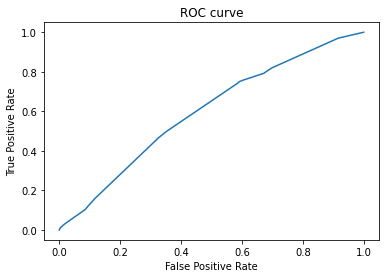

In [ ]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')